In [12]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler

Scaling is essential for K-Nearest Neighbors (KNN) regression and classification.

KNN works by calculating the distance between data points to find the "nearest neighbors." If features have different scales, those with larger ranges will dominate the distance calculation, potentially leading to biased predictions. For instance, a feature measured in thousands could overpower another feature measured in single digits, even if both are equally important. Scaling helps KNN to treat all features fairly in the distance calculation.

Common scaling methods for KNN include:

1. **Standardization (Z-score scaling):** Centers the data around zero with a standard deviation of one.
2. **Min-Max scaling:** Scales features to a fixed range, usually 0 to 1.

With scaled data, KNN can better identify the true nearest neighbors, improving both classification and regression accuracy.

In [13]:
df=pd.read_csv("../Pandas Dataset/KNNAlgorithmDataset.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [14]:
df['diagnosis']=df['diagnosis'].map({"M":1,"B":0})
df.drop("id",axis=1,inplace=True)
df.drop("Unnamed: 32",axis=1,inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
x=df.drop("diagnosis",axis=1)
y=df["diagnosis"]

In [16]:
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.7)

<Axes: >

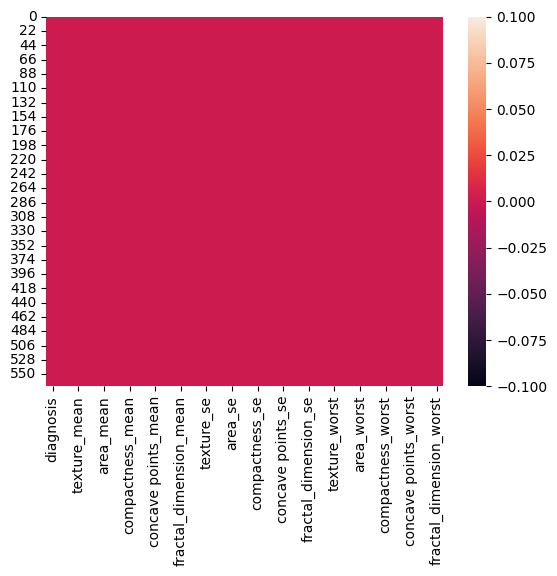

In [17]:
import seaborn as sns
import numpy as np
sns.heatmap(np.isnan(df))

In [18]:
scaler=StandardScaler()
x_scaled_train=scaler.fit_transform(x_train)
x_scaled_test=scaler.fit_transform(x_test)

In [19]:
model=KNeighborsClassifier(n_neighbors=2,algorithm="auto")
model.fit(x_scaled_train,y_train)


KNeighborsClassifier(n_neighbors=2)

In [20]:
y_predict=model.predict(x_scaled_train)

In [21]:
confusion_matrix(y_train,y_predict)

array([[117,   0],
       [  9,  44]], dtype=int64)

In [22]:
accuracy_score(y_train,y_predict)

0.9470588235294117

In [23]:
from sklearn.neighbors import KNeighborsRegressor

model=KNeighborsRegressor(n_neighbors=5)

In [24]:
df=pd.read_csv("../Pandas Dataset/Salary_dataset.csv")
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [25]:
df.drop(columns="Unnamed: 0",axis=1,inplace=True)

In [26]:
x=df.drop(columns="Salary",axis=1)
y=df["Salary"]


In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.75)

In [28]:
model.fit(x_train,y_train)

KNeighborsRegressor()

In [29]:
y_predict=model.predict(x_test)

In [30]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_predict,y_test)

0.8856140180959928

In [33]:
mean_squared_error(y_test,y_predict)


53726269.399999976

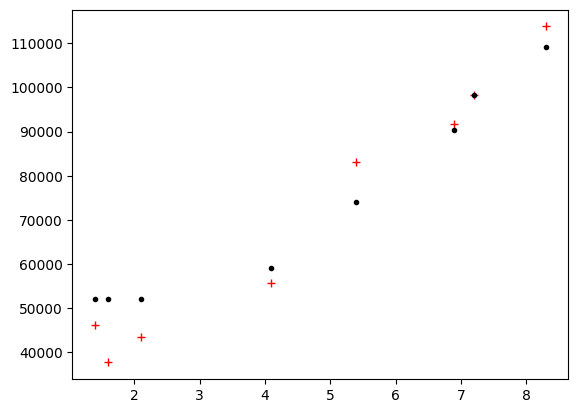

In [32]:
import matplotlib.pyplot as plt
plt.plot(x_test,y_test,"r+")
plt.plot(x_test,y_predict,"k.")

plt.show()

**Scaling**

* Scaling (standardization or normalization) is required when we use any machine learning algorithm that requires gradient calculation.
* Examples of machine learning algorithms that require gradient calculations are: linear/logistic regression and artificial neural networks.
* Having different scales for each feature will result in a different step size which in turn jeopardizes the process of reaching a minimum point.

**No Scaling Required**

* Scaling is not required for distance-based and tree-based algorithms such as K-Means Clustering, Support Vector Machines and K Nearest Neighbors, decision trees, random forest, and XG-Boost.

Let me know if you have any other questions! 
